# QAOA for Max Cut, Toy Example
In this notebook the QAOA method is used to solve a small max cut problem. The quantum circuit used is shown and the approximation ratio for depth = 1 is  computed.

In [1]:
from qaoa import QAOA, problems, mixers, initialstates

In [2]:
import numpy as np
import networkx as nx
import sys                     
sys.path.append('../')         
from plotroutines import *

Creating problem instance

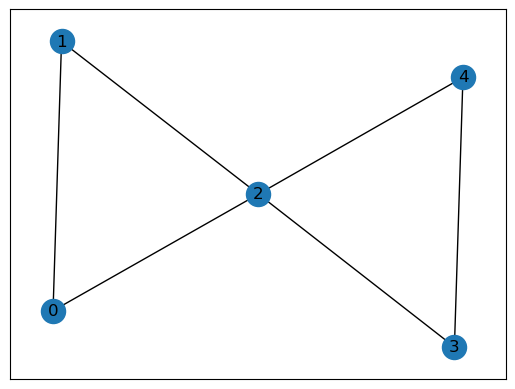

In [3]:
G = nx.Graph()
G.add_nodes_from(np.arange(0, 5, 1))
G.add_weighted_edges_from([(0, 1, 1.0), (0, 2, 1.0), (1, 2, 1.0), (3, 2, 1.0), (3, 4, 1.0), (4, 2, 1.0)])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos)

Creating a QAOA instance and drawing the quantum circuit

In [4]:
qaoa = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X()
)

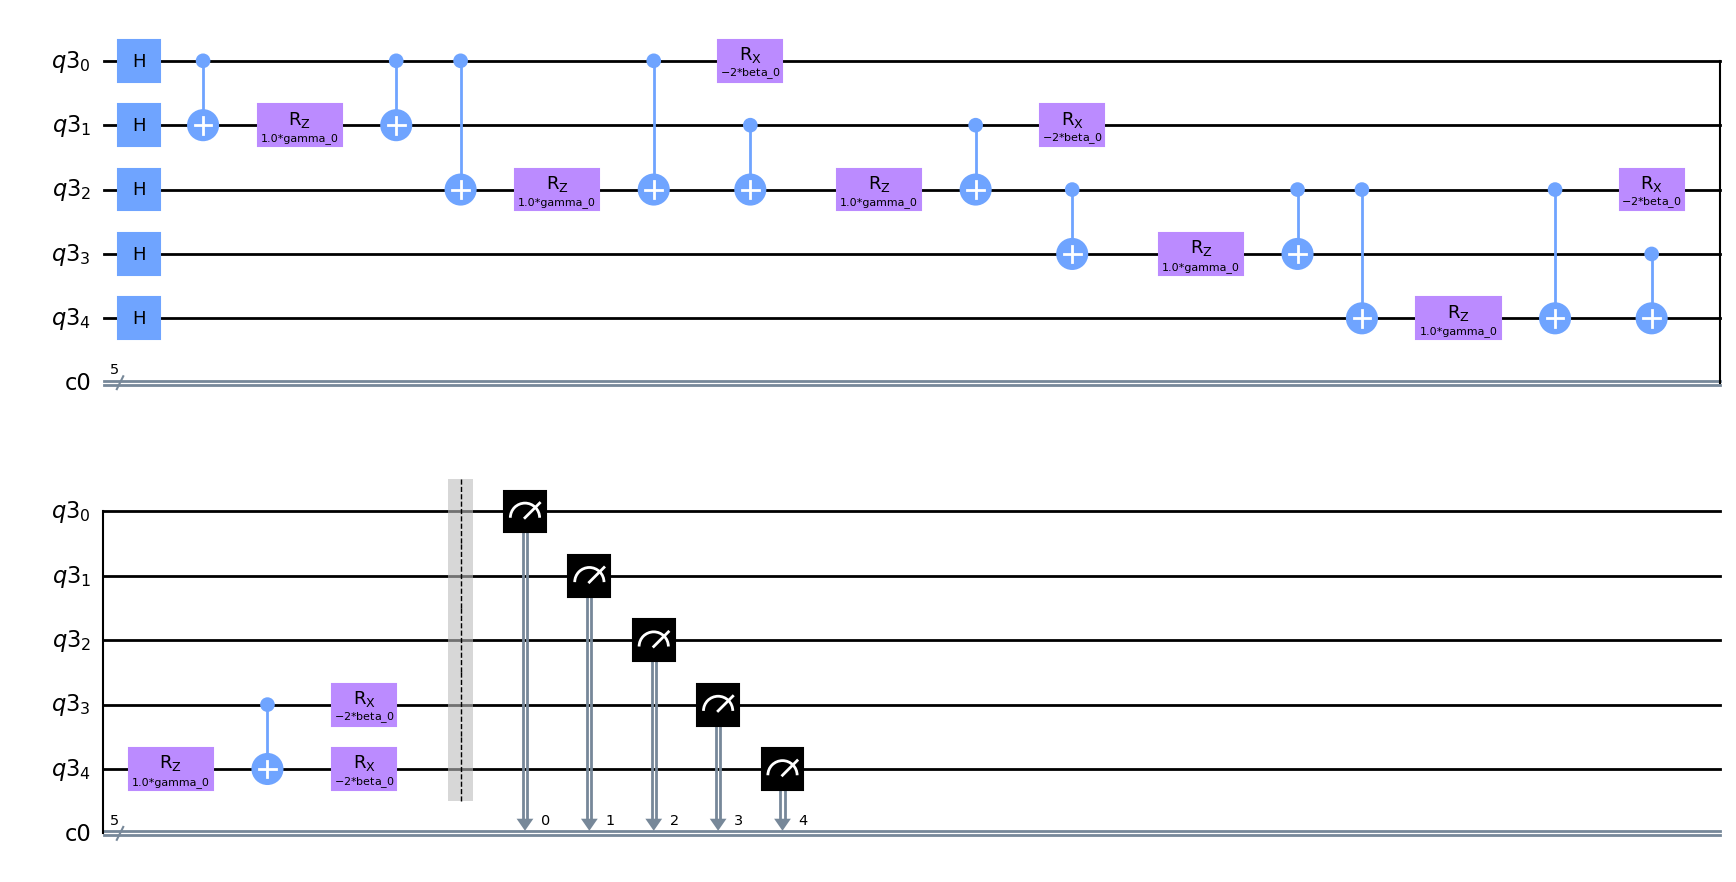

In [5]:
qaoa.createParameterizedCircuit(1)
qaoa.parameterized_circuit.draw(output="mpl")

circuits can also be drawn individually like this

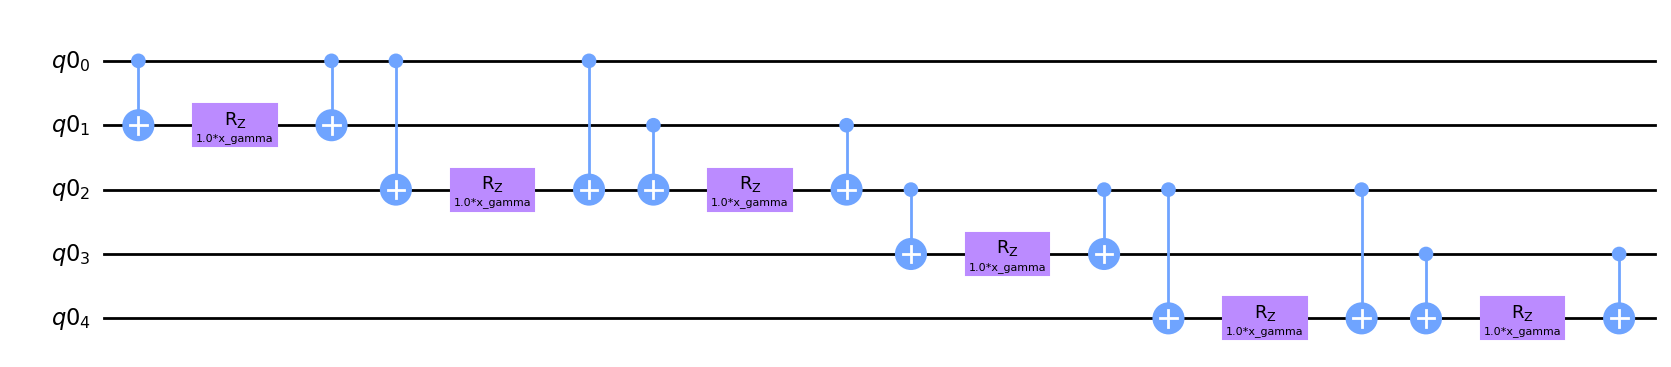

In [6]:
qaoa.problem.circuit.draw('mpl')

The cost landscape is sampled using angles $\gamma, \beta$ $\in$ $[0, \frac{\pi}{2}]$ on a $10\times10$ grid.

In [7]:
qaoa.sample_cost_landscape( angles={"gamma": [0, np.pi/2 , 10], "beta": [0, np.pi/2 , 10]} )

2023-09-24 20:25:04 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2023-09-24 20:25:04 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-24 20:25:04 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-24 20:25:04 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2023-09-24 20:25:04 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2023-09-24 20:25:04 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape


In [8]:
qaoa.optimize(depth=1)

2023-09-24 20:25:04 [info     ] cost(depth 1 = -3.943359375    file=qaoa.qaoa func=optimize


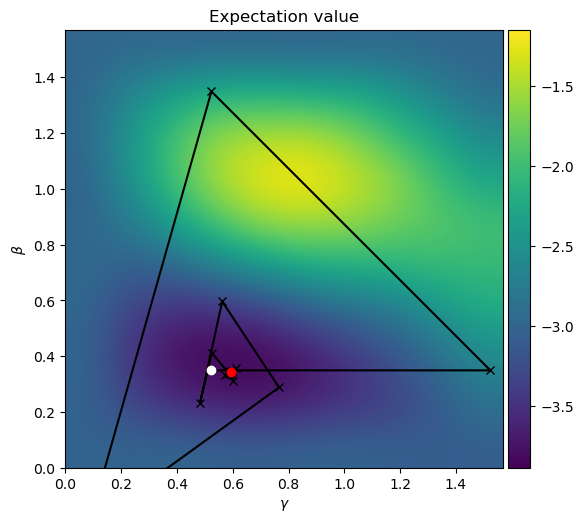

In [9]:
fig=pl.figure(figsize=(6,6))
gamma=[]
beta=[]
angles=qaoa.optimization_results[1].angles
for i in range(len(angles)):
    gamma.append(angles[i][0])
    beta.append(angles[i][1])
pl.plot(gamma, beta,'x-k')
pl.plot(gamma[0], beta[0],'wo')
pl.plot(gamma[-1], beta[-1],'or')
plot_E(qaoa,fig=fig)

plot how the expectation value changes during optimization

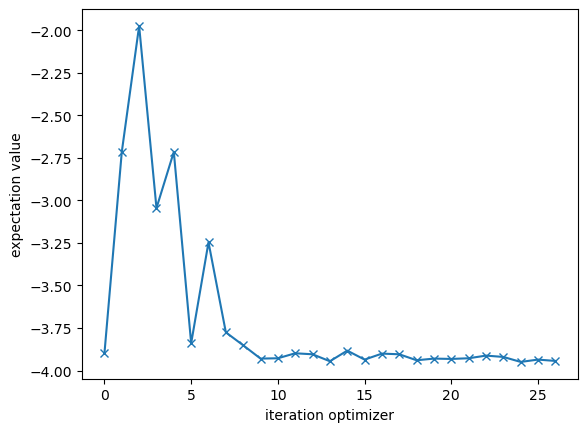

In [10]:
pl.plot(qaoa.optimization_results[1].Exp,"x-")
_=pl.ylabel("expectation value")
_=pl.xlabel("iteration optimizer")